# Movie Genres Classification

Predicting the genre of movie from just 1000 characters of the script.

Dataset Link: https://www.kaggle.com/c/moviegenres/overview

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv('F:/Machine-Learning-Projects-master/Movies Genre Classification/kaggle_movie_train.csv')

In [3]:
df.shape

(22579, 3)

In [4]:
df.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [5]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

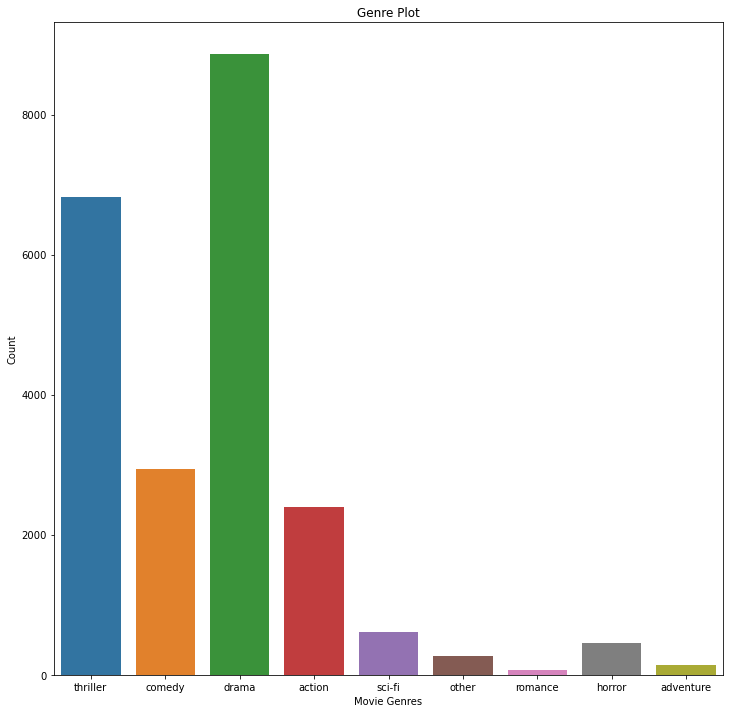

In [6]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

## Data Cleaning and Preprocessing

In [7]:
# Finding unique genres
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [8]:
# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [9]:
# Finding any NaN values
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [10]:
# Removing the 'id' column
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [11]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Anoop
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
df.shape

(22579, 2)

In [13]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [14]:
corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [15]:
df[df['genre']==4].index

Int64Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,
               16,
            ...
            22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574,
            22575],
           dtype='int64', length=8873)

In [16]:
len(corpus)

22579

In [17]:
drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

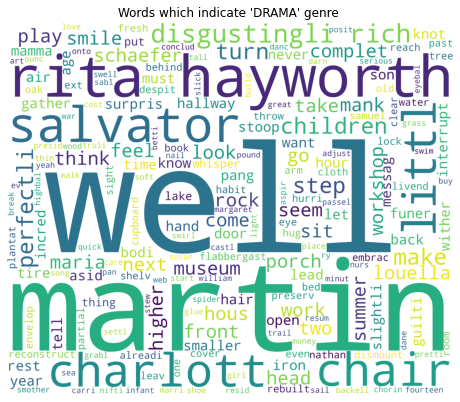

In [20]:
# Creating wordcloud for drama genre

from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

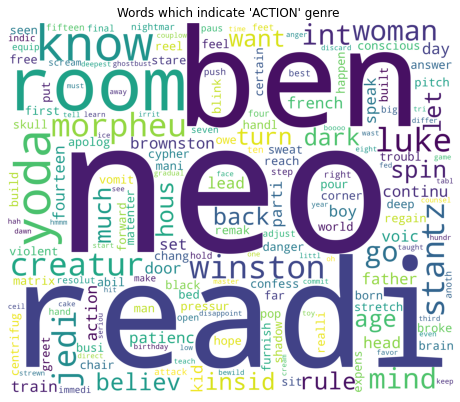

In [21]:
# Creating wordcloud for action genre
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

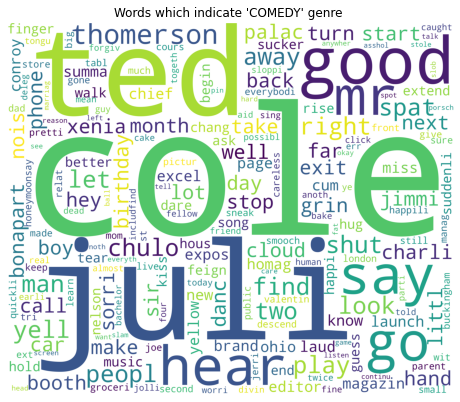

In [22]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [23]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [24]:
y = df['genre'].values

## Model Building

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


## Multinomial Naive Bayes

In [26]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [27]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.55%


In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [30]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   4,   41,    1,   37, 1607,   21,    1,   11,  104],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   77,   12,    0,   22, 1172]],
      dtype=int64)

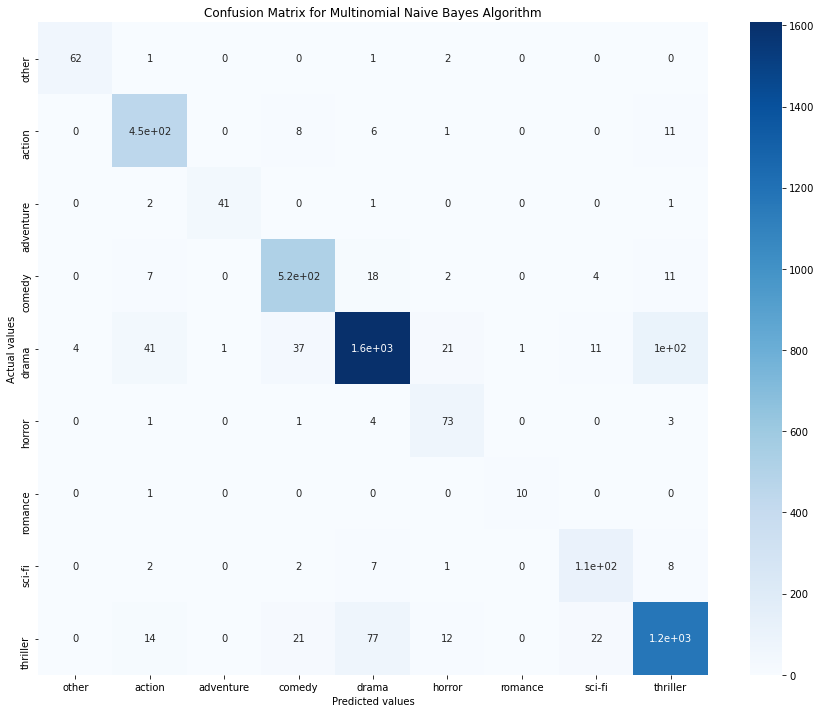

In [31]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [32]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.32%
Accuracy score for alpha=0.2 is: 91.03%
Accuracy score for alpha=0.3 is: 90.79%
Accuracy score for alpha=0.4 is: 90.54%
Accuracy score for alpha=0.5 is: 90.21%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 89.99%
Accuracy score for alpha=0.8 is: 89.9%
Accuracy score for alpha=0.9 is: 89.73%
Accuracy score for alpha=1.0 is: 89.55%
--------------------------------------------
The best accuracy is 91.32% with alpha value as 0.1


In [33]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

# Predictions

In [34]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [35]:
# For generating random integer
from random import randint

In [36]:
# Loading test dataset
test = pd.read_csv('F:/Machine-Learning-Projects-master/Movies Genre Classification/kaggle_movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [37]:
test.shape

(5589, 2)

In [38]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [39]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ER as the sports writer, Whitey, interviews him. WHITEY How's it feel to get your first professional win? EBBY It feels out there . A major rush. I mean it doesn't just feel out there but it feels out there. CRASH Hopeless. Utterly fucking hopeless. CUT TO INT. MAXWELL'S BAR LATER THAT NIGHT Loud country music in the players' hangout and pickup spot. It's full of players and lots of young women. MILLIE SITS DOWN NEXT TO YET ANOTHER PLAYER, TONY, 25 He's slick, urban, smooth. MILLIE Hi, I'm Millie. TONY I'm Tony. I play left field. MILLIE I know. ANNIE SITS IN THE CORNER at her own table. Max Patkin, looking spiffy in a turtle neck sweater and double breasted blazer, sits down next to her. Old friends. MAX Love the game, Annie, love it dead serious When I die I'm gonna have my ashes sprinkled around a pitcher's mound in some ballpark somewhere beat and I'll have a few ashes saved for the rosin bag so I'll still be in the game after I'm gone. ANNIE What a sweet idea A COCKTAIL WA

In [40]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ME CLOSEUP, shouting. The red heat ray seems to envelope him in a blaze of color, SCREAMING. Suddenly the SCREEN explodes into deadly blue green the disintegrating beam! The Colonel's shout is frozen on his lips. The skeletal structure of his head glows incandescent greenish white through the flesh of his face. In an instant he vanishes into a shred of blue green vapor which swirls and is lost in the ruddy flames of the ray. DISSOLVE 150. EXT. SKY FULL SHOT STOCK A huge formation of fighter bombers flashes across the sky, the chorus of their jets pulsating like thunder. DISSOLVE 151. EXT. ROAD MED. SHOT A weapons carrier clatters past at breakneck speed. Men from mixed units jump from behind scrub trees, running. A crowded jeep flashes past as Clayton and Sylvia appear. The two run after the men. Clayton pulls her to a stop, looks o.s., then runs across the road with her. 152. EXT. FIELD MED. SHOT A Piper Cub battery observation plane is just taking off. Another is on the groun

In [41]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: titled Take him away! The guards grab Han and start to lead him away. HAN Jabba... I'll pay you triple! You're throwing away a fortune here. Don't be a fool! Han is dragged off, as Lando quickly moves forward and attempts to lead Leia away. JABBA in Huttese subtitled Bring her to me. Jabba chuckles as Lando and a second guard drag the beautiful young princess toward him. Threepio peeks from behind a monster and quickly turns away in disgust. LEIA We have powerful friends. You're gonna regret this... JABBA in Huttese subtitled I'm sure. Inexorably her lovely face moves to within a few inches of Jabba's ugly blob of a head, and Leia turns away in disgust. LEIA Ugh! THREEPIO Ohhh, I can't bear to watch. 15 INT DUNGEON CELL 15 The heavy metal door of the dungeon whines and slowly creaks open. A guard throws the blinded star captain into the dark cell and the door slams shut behind him, leaving only a thin sliver of light from a crack in the door. Han is trying to collect himself wh

In [42]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: Woody jumps up SCREAMING, his forehead burning. He runs to a bowl of half eaten cereal with milk on the floor, and dunks his head in. Buzz runs over to Woody, pausing to remove two suction cup darts from his person before pulling Woody out of the bowl. Two colorful Froot Loops stick to each of Woody's eyes like glasses. BUZZ Are you alright? whacking him on the back I'm proud of you, Sheriff. A lesser man would have talked under such torture. Woody looks at his reflection in the back of the cereal spoon and rubs the burn mark on his forehead. WOODY I sure hope this isn't permanent. BUZZ checking his wrist communicator Still no word from Star Command. We're not that far from the spaceport Woody's eyes light up. ANGLE SPOON Sid's bedroom door can be seen in the reflection. It's open. WOODY The door! It's open! We're free!! Woody runs for the door. Buzz follows. BUZZ Woody, we don't know what's out there! WOODY I'll tell you what's AAAAH! THE MUTANT TOYS suddenly appear and block 

In [43]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: s is Enterprise call beat, to Spock it's no use there's no response from Regula One. SPOCK But no longer jammed? UHURA No, sir. No nothing. Spock considers, moves to Kirk. SPOCK There are two possibilities. They are unable to respond, they are unwilling to respond. KIRK How far? SPOCK Twelve hours, forty three minutes, present speed. KIRK Give up Genesis, she said. What in God's name does that mean? Give it up to whom? SPOCK It might help my analysis if I knew what Genesis was. Beyond the Biblical reference. Kirk looks at him, nods rising now. KIRK Uhura, have Doctor McCoy join us inn my quarters. CONTINUED 43. 54 CONTINUED 54 UHURA Aye, sir. KIRK Mister Saavik? You have the con. They start for the Turbo Lifts as Saavik reacts 55 KIRK'S QUARTERS 55 Kirk and Spock as Bones enters BONES I've got the sick bay ready. Will someone please tell me what's going on? KIRK dims lights Computer. Request security procedure and access to Project Genesis Summary. COMPUTER VOICE Identify for r